# **Install required packages**

In [1]:
!pip install pandas numpy matplotlib seaborn nltk wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Read the CSV file**

In [3]:
df = pd.read_csv('/content/customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


# **Display basic info**

In [4]:
print(f"Dataset shape: {df.shape}")
df.info()

Dataset shape: (8469, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 n

# **Check for missing values**

In [5]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


# **Handle missing values**

In [6]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

In [7]:
df['Resolution'].fillna('No resolution provided', inplace=True)
df['Ticket Status'].fillna('Unknown', inplace=True)


<ipython-input-7-f5e65203b899>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Resolution'].fillna('No resolution provided', inplace=True)
<ipython-input-7-f5e65203b899>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

# **Feature engineering**

In [8]:
df['Ticket Creation Date'] = pd.to_datetime(df['Date of Purchase'])
df['Response Time (hours)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

# **Extract product categories**

In [9]:
def categorize_product(product):
    product = str(product).lower()
    if 'gopro' in product or 'camera' in product:
        return 'Electronics'
    elif 'office' in product or 'photoshop' in product or 'autocad' in product:
        return 'Software'
    elif 'xbox' in product or 'playstation' in product or 'nintendo' in product:
        return 'Gaming'
    elif 'nest' in product or 'hue' in product or 'echo' in product:
        return 'Smart Home'
    else:
        return 'Other'

df['Product Category'] = df['Product Purchased'].apply(categorize_product)

# **Ticket Type Distribution**

<ipython-input-10-b00c9ed0fd35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_type_counts.values, y=ticket_type_counts.index, palette='viridis')


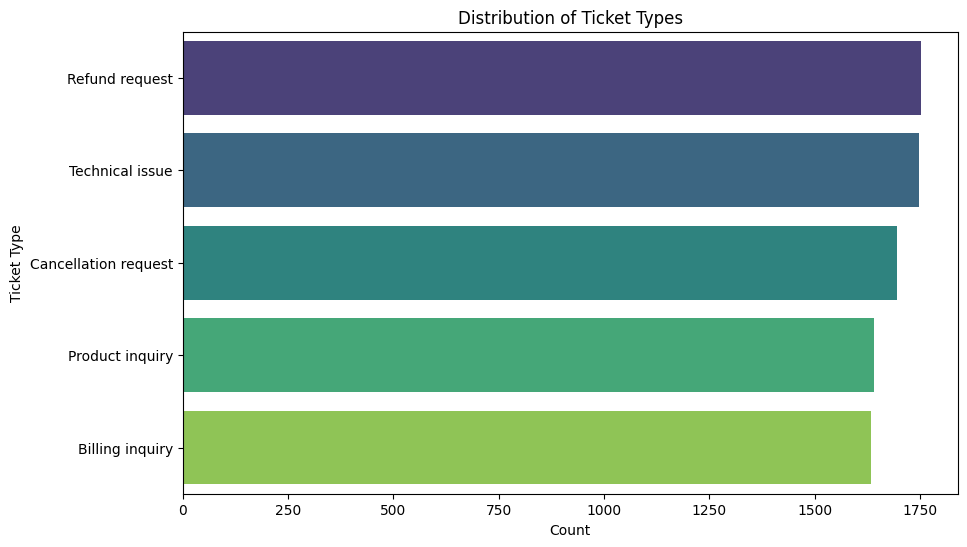

In [10]:
plt.figure(figsize=(10,6))
ticket_type_counts = df['Ticket Type'].value_counts()
sns.barplot(x=ticket_type_counts.values, y=ticket_type_counts.index, palette='viridis')
plt.title('Distribution of Ticket Types')
plt.xlabel('Count')
plt.ylabel('Ticket Type')
plt.show()

# **Product Category Distribution**

<ipython-input-11-664719b2f0de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette='magma')


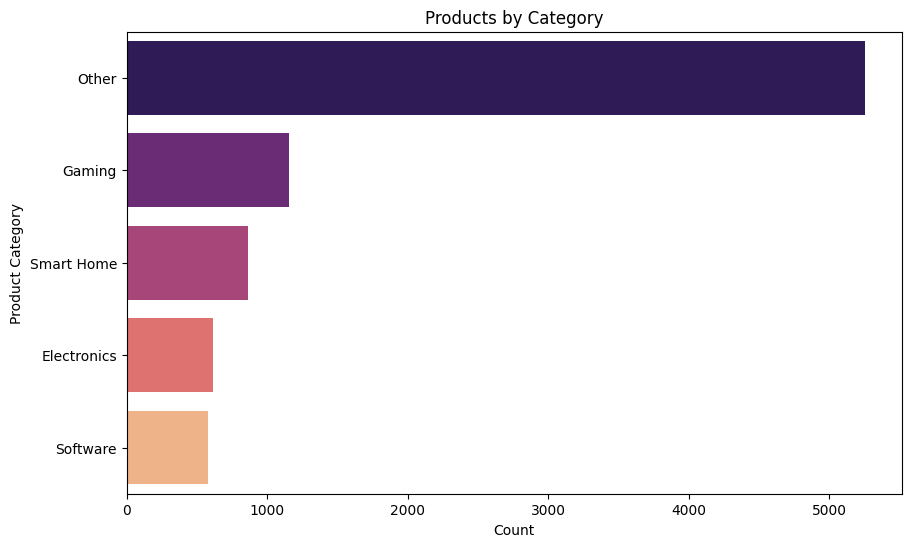

In [11]:
plt.figure(figsize=(10,6))
product_counts = df['Product Category'].value_counts()
sns.barplot(x=product_counts.values, y=product_counts.index, palette='magma')
plt.title('Products by Category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

# **Customer Satisfaction Analysis**

<ipython-input-13-39c4c7582e64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_by_channel.values, y=satisfaction_by_channel.index, palette='rocket')


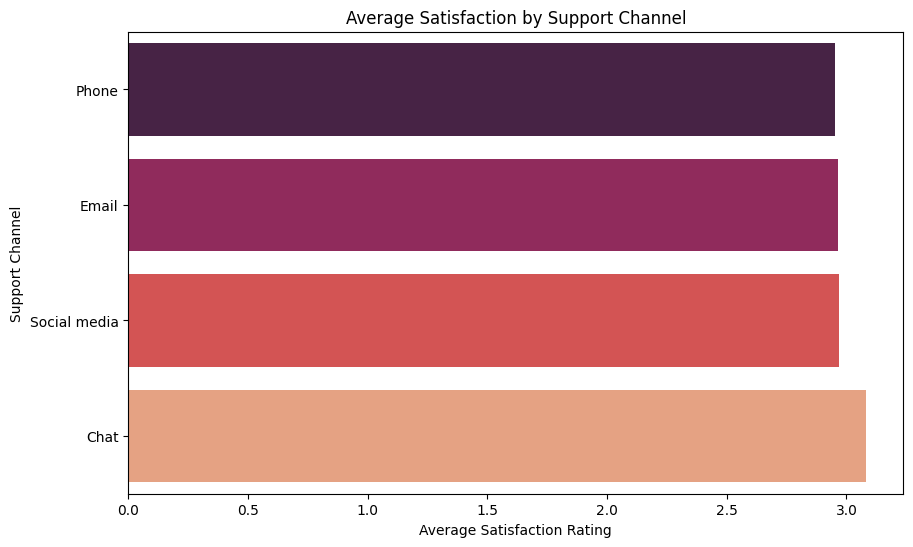

In [13]:
plt.figure(figsize=(10,6))
satisfaction_by_channel = df.groupby('Ticket Channel')['Customer Satisfaction Rating'].mean().sort_values()
sns.barplot(x=satisfaction_by_channel.values, y=satisfaction_by_channel.index, palette='rocket')
plt.title('Average Satisfaction by Support Channel')
plt.xlabel('Average Satisfaction Rating')
plt.ylabel('Support Channel')
plt.show()

# **Response Time Analysis**

<ipython-input-14-abad2ff16307>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticket Priority', y='Response Time (hours)', data=df, palette='Set2')


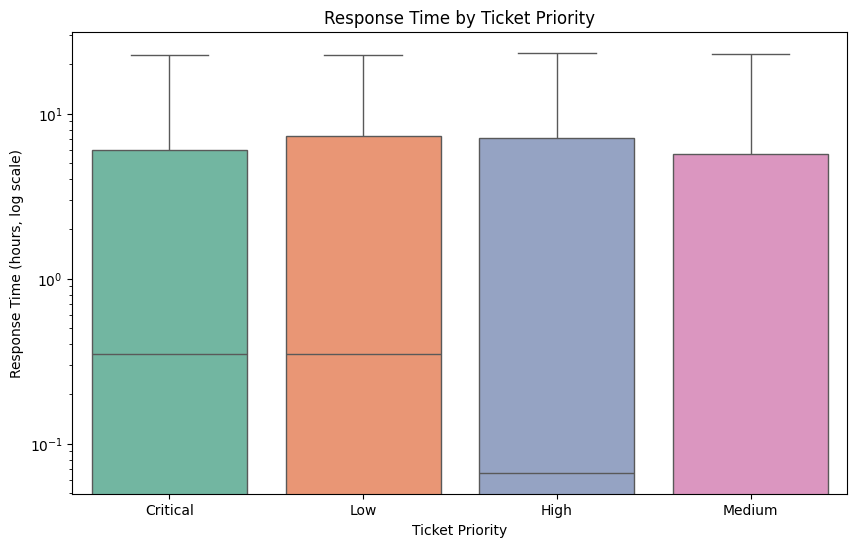

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Ticket Priority', y='Response Time (hours)', data=df, palette='Set2')
plt.title('Response Time by Ticket Priority')
plt.yscale('log')  # Using log scale due to outliers
plt.ylabel('Response Time (hours, log scale)')
plt.show()

# **Generate insights programmatically**

In [15]:
top_products = df['Product Purchased'].value_counts().head(5).index.tolist()
avg_satisfaction = df['Customer Satisfaction Rating'].mean()
slowest_channel = df.groupby('Ticket Channel')['Response Time (hours)'].mean().idxmax()

print(f"\nKey Insights:")
print(f"1. Top 5 products with most issues: {', '.join(top_products)}")
print(f"2. Average customer satisfaction: {avg_satisfaction:.1f}/5")
print(f"3. Slowest response channel: {slowest_channel}")
print(f"4. {len(df[df['Ticket Priority'] == 'Critical'])} critical tickets need attention")



Key Insights:
1. Top 5 products with most issues: Canon EOS, GoPro Hero, Nest Thermostat, Amazon Echo, Philips Hue Lights
2. Average customer satisfaction: 3.0/5
3. Slowest response channel: Chat
4. 2129 critical tickets need attention


# **Generate recommendations**

In [16]:
print("\nRecommendations:")
print("1. Create knowledge base articles for top product issues")
print("2. Implement chatbot for common inquiries (account access, basic troubleshooting)")
print(f"3. Improve response times for {slowest_channel} channel")
print("4. Standardize response templates for billing and refund requests")
print("5. Work with product teams on recurring hardware/software issues")


Recommendations:
1. Create knowledge base articles for top product issues
2. Implement chatbot for common inquiries (account access, basic troubleshooting)
3. Improve response times for Chat channel
4. Standardize response templates for billing and refund requests
5. Work with product teams on recurring hardware/software issues


# **Save processed data and visualizations**

In [20]:
df.to_csv('/content/processed_support_tickets.csv', index=False)


# **Save visualizations**

In [21]:

# Save visualizations
plt.savefig('ticket_type_distribution.png')
plt.savefig('product_category_distribution.png')
plt.savefig('common_issues_wordcloud.png')
plt.savefig('satisfaction_by_channel.png')
plt.savefig('response_time_analysis.png')

print("\nAnalysis completed. Files downloaded.")


Analysis completed. Files downloaded.


<Figure size 640x480 with 0 Axes>